In [2]:
#Retos de programacion
import numpy as np


def es_hermitiana(matriz):
    return np.allclose(matriz, np.conjugate(matriz.T))

def probabilidad_transicion(ket1, ket2):
    producto_interno = np.vdot(ket1, ket2)
    probabilidad = np.abs(producto_interno) ** 2
    return probabilidad

def valor_medio(observable, ket):
    bra = np.conjugate(ket.T)
    valor = np.dot(bra, np.dot(observable, ket))
    return np.real(valor)

def varianza(observable, ket):
    observable_cuadrada = np.dot(observable, observable)
    valor_medio_cuadrado = valor_medio(observable, ket) ** 2
    valor_medio_cuadrado_de_observable = valor_medio(observable_cuadrada, ket)
    var = valor_medio_cuadrado_de_observable - valor_medio_cuadrado
    return np.real(var)

def valores_propios_y_probabilidades(observable, ket):
    valores_propios, autovectores = np.linalg.eigh(observable)
    probabilidades = [probabilidad_transicion(ket, autovectores[:, i]) for i in range(len(valores_propios))]
    return valores_propios, probabilidades

def aplicar_dinamica(matrices, estado_inicial):
    estado_final = estado_inicial
    for U in matrices:
        estado_final = np.dot(U, estado_final)
    return estado_final

def obtener_matriz_cuadrada(tamano):
    matriz = []
    print(f"Introduce los elementos de la matriz ({tamano}x{tamano}), en formato 'real,imag' separados por espacios:")
    for i in range(tamano):
        fila = []
        for j in range(tamano):
            real, imag = map(float, input(f"Elemento ({i+1},{j+1}): ").split(','))
            fila.append(complex(real, imag))
        matriz.append(fila)
    return np.array(matriz)

def obtener_ket(tamano):
    ket = []
    print(f"Introduce {tamano} amplitudes complejas (en formato 'real,imag'): ")
    for i in range(tamano):
        real, imag = map(float, input(f"Amplitud {i+1}: ").split(','))
        ket.append(complex(real, imag))
    return np.array(ket)

def obtener_matrices_dinamica(tamano, num_matrices):
    matrices = []
    for n in range(num_matrices):
        print(f"\nIntroduce la matriz de evolución U{n+1}:")
        matriz = obtener_matriz_cuadrada(tamano)
        matrices.append(matriz)
    return matrices

def main():
    print("Simulador de sistema cuántico\n")
    
    tamano = 2  
    
    print("\nIntroduce el primer ket (estado inicial):")
    ket1 = np.array([complex(1, 0), complex(0, 1)]) 
    
    
    print("\nIntroduce el segundo ket (estado final):")
    ket2 = np.array([complex(0.707, 0.707), complex(0, 0)])  
    
    probabilidad_trans = probabilidad_transicion(ket1, ket2)
    print(f"\nProbabilidad de transición entre los kets: {probabilidad_trans:.4f}")
    
    
    print("\nIntroduce la matriz del observable:")
    observable = np.array([[1, 0], [0, 2]])  
    
    if es_hermitiana(observable):
        media = valor_medio(observable, ket1)
        var = varianza(observable, ket1)
        print(f"\nMedia del observable: {media:.4f}")
        print(f"Varianza del observable: {var:.4f}")
    else:
        print("\nError: La matriz ingresada no es hermitiana.")
        return
    
    # Parte 3: Valores propios y probabilidades de transición
    valores_propios, probabilidades = valores_propios_y_probabilidades(observable, ket1)
    print(f"\nValores propios del observable: {valores_propios}")
    for i, prob in enumerate(probabilidades):
        print(f"Probabilidad de transición al autovector {i+1}: {prob:.4f}")
    
    # Parte 4: Dinámica del sistema
    num_matrices = 2  
    matrices_dinamica = [
        np.array([[0, 1], [1, 0]]),  
        np.array([[1, 0], [0, np.exp(1j * np.pi / 4)]])  
    ]
    
    estado_final = aplicar_dinamica(matrices_dinamica, ket1)
    print(f"\nEstado final después de aplicar la dinámica: {estado_final}")

main()

Simulador de sistema cuántico


Introduce el primer ket (estado inicial):

Introduce el segundo ket (estado final):

Probabilidad de transición entre los kets: 0.9997

Introduce la matriz del observable:

Media del observable: 3.0000
Varianza del observable: -4.0000

Valores propios del observable: [1. 2.]
Probabilidad de transición al autovector 1: 1.0000
Probabilidad de transición al autovector 2: 1.0000

Estado final después de aplicar la dinámica: [0.        +1.j         0.70710678+0.70710678j]


In [2]:
#Ejercicio 4.3.1
import numpy as np

hbar = 1  
S_x = (hbar / 2) * np.array([[0, 1],
                              [1, 0]])

estado_up_z = np.array([[1],
                        [0]])

estado_down_z = np.array([[0],
                           [1]])

estado_resultante = S_x @ estado_up_z

estado_resultante /= np.linalg.norm(estado_resultante)

print("Estado  después de aplicar S_x:")
print(estado_resultante.flatten())

estado_up_x = 1 / np.sqrt(2) * (estado_up_z + estado_down_z)  
estado_down_x = 1 / np.sqrt(2) * (estado_up_z - estado_down_z)  

probabilidad_up_x = np.abs(np.dot(estado_up_x.T, estado_resultante)) ** 2
probabilidad_down_x = np.abs(np.dot(estado_down_x.T, estado_resultante)) ** 2

print(f"Probabilidad de que el estado sea spin up (en x): {probabilidad_up_x[0][0]:.2f}")
print(f"Probabilidad de que el estado sea spin down (en x): {probabilidad_down_x[0][0]:.2f}")

print("Posibles estados después de la medición:")
print("Estado |up> en dirección x:", estado_up_x.flatten())
print("Estado |down> en dirección x:", estado_down_x.flatten())




Estado resultante después de aplicar S_x:
[0. 1.]
Probabilidad de que el estado sea 'spin up' (en x): 0.50
Probabilidad de que el estado sea 'spin down' (en x): 0.50
Posibles estados después de la medición:
Estado |up> en dirección x: [0.70710678 0.70710678]
Estado |down> en dirección x: [ 0.70710678 -0.70710678]


Probabilidad p1 (|e1>): 0.50
Probabilidad p2 (|e2>): 0.50
Valor Esperado: 0.00


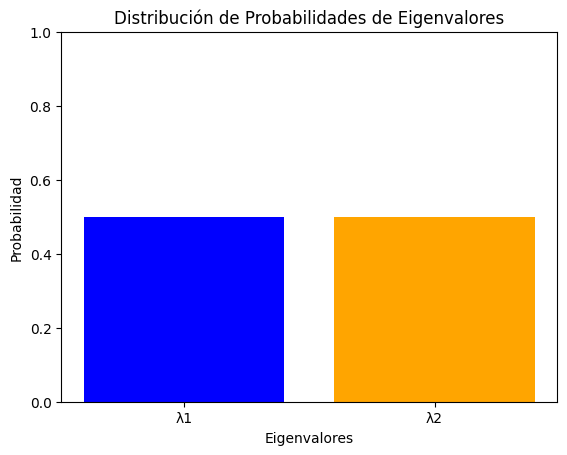

In [4]:
import numpy as np
import matplotlib.pyplot as plt


hbar = 1  
S_x = (hbar / 2) * np.array([[0, 1],
                              [1, 0]])

estado_up_z = np.array([[1],
                        [0]])

estado_down_z = np.array([[0],
                           [1]])

estado_resultante = S_x @ estado_up_z

estado_resultante /= np.linalg.norm(estado_resultante)

estado_e1 = 1 / np.sqrt(2) * (estado_up_z + estado_down_z)  
estado_e2 = 1 / np.sqrt(2) * (estado_up_z - estado_down_z)  
lambda_1 = hbar / 2  
lambda_2 = -hbar / 2  

p1 = np.abs(np.dot(estado_resultante.T, estado_e1)) ** 2
p2 = np.abs(np.dot(estado_resultante.T, estado_e2)) ** 2

valor_esperado = p1 * lambda_1 + p2 * lambda_2

print(f"Probabilidad p1 (|e1>): {p1[0][0]:.2f}")
print(f"Probabilidad p2 (|e2>): {p2[0][0]:.2f}")
print(f"Valor Esperado: {valor_esperado.item():.2f}")  


plt.bar(['λ1', 'λ2'], [p1[0][0], p2[0][0]], color=['blue', 'orange'])
plt.xlabel('Eigenvalores')
plt.ylabel('Probabilidad')
plt.title('Distribución de Probabilidades de Eigenvalores')
plt.ylim(0, 1)
plt.show()



In [5]:
#Ejercicio 4.4.1
import numpy as np

U1 = np.array([[0, 1],
               [1, 0]])

U2 = np.array([[np.sqrt(2)/2, np.sqrt(2)/2],
               [np.sqrt(2)/2, -np.sqrt(2)/2]])

def es_unitaria(U):
    return np.allclose(np.dot(U, U.conj().T), np.eye(U.shape[0]))

print(f'U1 es unitaria: {es_unitaria(U1)}')
print(f'U2 es unitaria: {es_unitaria(U2)}')

U_producto = np.dot(U1, U2)

print(f'U1 * U2 es unitaria: {es_unitaria(U_producto)}')


U1 es unitaria: True
U2 es unitaria: True
U1 * U2 es unitaria: True


In [8]:
#Ejercicio 4.4.2
import numpy as np

estado_inicial = np.array([[1], [0], [0], [0]], dtype=complex)

U = np.array([[0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
              [1j/np.sqrt(2), 0, 0, 1/np.sqrt(2)],
              [1/np.sqrt(2), 0, 0, 1j/np.sqrt(2)],
              [0, 1/np.sqrt(2), -1/np.sqrt(2), 0]], dtype=complex)

estado_1 = np.dot(U, estado_inicial)
estado_2 = np.dot(U, estado_1)
estado_3 = np.dot(U, estado_2)

probabilidad_punto_3 = np.abs(estado_3[2, 0])**2  

print(f"Probabilidad de encontrar la bola en el punto 3: {probabilidad_punto_3:.4f}")


Estado después del primer paso: [0.        +0.j         0.        +0.70710678j 0.70710678+0.j
 0.        +0.j        ]
Estado después del segundo paso: [ 0.5+0.5j  0. +0.j   0. +0.j  -0.5+0.5j]
Estado después del tercer paso: [ 0.        +0.j         -0.70710678+0.70710678j  0.        +0.j
  0.        +0.j        ]
Probabilidad de encontrar la bola en el punto 3: 0.0000


In [2]:
#Ejercicio 4.5.2

import numpy as np

def estado_generico(n):
    num_estados = 2 ** n
    
    amplitudes = np.random.rand(num_estados) + 1j * np.random.rand(num_estados)  
    amplitudes /= np.linalg.norm(amplitudes)  

    estados_base = []
    for i in range(num_estados):
        estado_binario = format(i, f'0{n}b') 
        estado = ''.join('↑' if bit == '0' else '↓' for bit in estado_binario)
        estados_base.append(estado)
    
    print(f"Estado genérico para {n} partículas:")
    for i in range(num_estados):
        print(f"a_{i} |{estados_base[i]}⟩: {amplitudes[i]:.2f}")

n_particulas = 5
estado_generico(n_particulas)


Estado genérico para 5 partículas:
a_0 |↑↑↑↑↑⟩: 0.20+0.10j
a_1 |↑↑↑↑↓⟩: 0.18+0.17j
a_2 |↑↑↑↓↑⟩: 0.15+0.01j
a_3 |↑↑↑↓↓⟩: 0.16+0.01j
a_4 |↑↑↓↑↑⟩: 0.02+0.17j
a_5 |↑↑↓↑↓⟩: 0.17+0.09j
a_6 |↑↑↓↓↑⟩: 0.08+0.10j
a_7 |↑↑↓↓↓⟩: 0.16+0.21j
a_8 |↑↓↑↑↑⟩: 0.02+0.01j
a_9 |↑↓↑↑↓⟩: 0.02+0.07j
a_10 |↑↓↑↓↑⟩: 0.10+0.10j
a_11 |↑↓↑↓↓⟩: 0.12+0.09j
a_12 |↑↓↓↑↑⟩: 0.03+0.17j
a_13 |↑↓↓↑↓⟩: 0.08+0.17j
a_14 |↑↓↓↓↑⟩: 0.09+0.16j
a_15 |↑↓↓↓↓⟩: 0.12+0.14j
a_16 |↓↑↑↑↑⟩: 0.19+0.19j
a_17 |↓↑↑↑↓⟩: 0.13+0.11j
a_18 |↓↑↑↓↑⟩: 0.08+0.08j
a_19 |↓↑↑↓↓⟩: 0.11+0.01j
a_20 |↓↑↓↑↑⟩: 0.17+0.09j
a_21 |↓↑↓↑↓⟩: 0.15+0.11j
a_22 |↓↑↓↓↑⟩: 0.12+0.04j
a_23 |↓↑↓↓↓⟩: 0.07+0.11j
a_24 |↓↓↑↑↑⟩: 0.06+0.05j
a_25 |↓↓↑↑↓⟩: 0.03+0.09j
a_26 |↓↓↑↓↑⟩: 0.16+0.21j
a_27 |↓↓↑↓↓⟩: 0.20+0.12j
a_28 |↓↓↓↑↑⟩: 0.02+0.11j
a_29 |↓↓↓↑↓⟩: 0.15+0.09j
a_30 |↓↓↓↓↑⟩: 0.17+0.18j
a_31 |↓↓↓↓↓⟩: 0.00+0.17j


In [3]:
#Ejercicio 4.5.3
import numpy as np

def estado_separable(o, p):
    return np.array([[1, 0], [0, 0]]), np.array([[0, 1], [0, 0]])  

def estado_entrelazado():
    return np.array([[1, 0], [0, 1]]) 

def estado_phi():
    return np.array([[1, 0], [1, 0]])  

def es_separable(estado):
    if estado.shape[0] == 2 and estado.shape[1] == 2:
        return True
    return False

estado_x = estado_separable(0, 1)  
estado_y = estado_entrelazado()  

phi = estado_phi()

if es_separable(phi):
    print("El estado |φ⟩ es separable.")
else:
    print("El estado |φ⟩ es entrelazado.")
    
print("Estado |φ⟩:", phi)


El estado |φ⟩ es separable.
Estado |φ⟩: [[1 0]
 [1 0]]
